In [17]:
import pandas as pnd
import seaborn as sns

data_energy=pnd.read_csv("energy_scores-sep_wdiff.csv", sep ="\t")
data_energy.describe()
print(data_energy)
data_energy_part1=data_energy[0:103]
data_energy_part2=data_energy[103:]
print(data_energy_part2)

      PDB  rigid_energy_score.start      end.  rigid_energy_score_refe.start  \
0    1A2K                 32827.166   109.172                        -18.252   
1    1ACB                   394.611   -19.340                        -25.516   
2    1AHW                    -5.139   -20.475                        -24.520   
3    1AK4                   256.465   -20.700                        -21.501   
4    1AKJ                    64.045   -16.822                        -23.760   
..    ...                       ...       ...                            ...   
199  4JCV                 20719.886  6214.058                        -23.330   
200  4LW4                  1493.736   -15.340                        -19.528   
201  4M76                     4.532   -11.589                         -9.461   
202  7CEI                   -24.988   -28.429                        -28.237   
203  9QFW                   -16.246   -23.268                        -22.704   

     end..1  energy_score.start     end

In [54]:
print(data_energy["rigid_energy_score.start"].describe())
print(data_energy["energy_score_wo_restraining.start"].describe())
print(data_energy["end."].describe())
print(data_energy["end..6"].describe())
print(data_energy["delta_energy_score_end_flex_minus_rig"].describe())
data_energy["delta_energy_score_end_flex_minus_rig"].quantile(q=0.7251)

count    2.040000e+02
mean     4.693327e+09
std      6.684363e+10
min     -2.498800e+01
25%      3.031750e+01
50%      9.504195e+02
75%      1.765983e+04
max      9.547297e+11
Name: rigid_energy_score.start, dtype: float64
count    2.040000e+02
mean     5.314590e+06
std      5.485165e+07
min     -1.025030e+02
25%     -1.148800e+01
50%      5.735915e+02
75%      7.351728e+03
max      7.747760e+08
Name: energy_score_wo_restraining.start, dtype: float64
count      204.000000
mean       207.689431
std       2266.358087
min        -34.064000
25%        -20.499000
50%        -16.411000
75%        -11.378750
max      31391.229000
Name: end., dtype: float64
count      204.000000
mean       315.676662
std       1398.216390
min       -174.803000
25%        -69.747000
50%        -43.208500
75%          8.011250
max      16191.028000
Name: end..6, dtype: float64
count      204.000000
mean       107.987230
std       2652.222946
min     -30882.764000
25%        -57.099250
50%        -28.591500
75%  

-0.5068577000000756

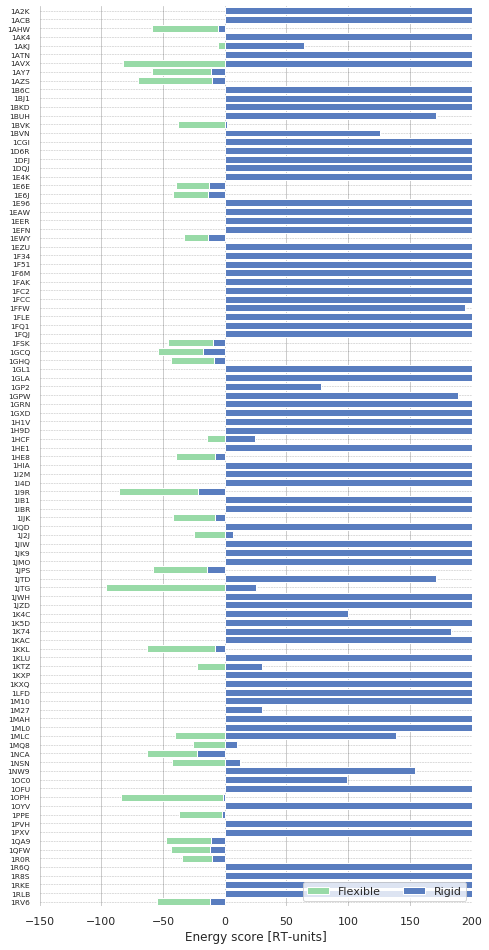

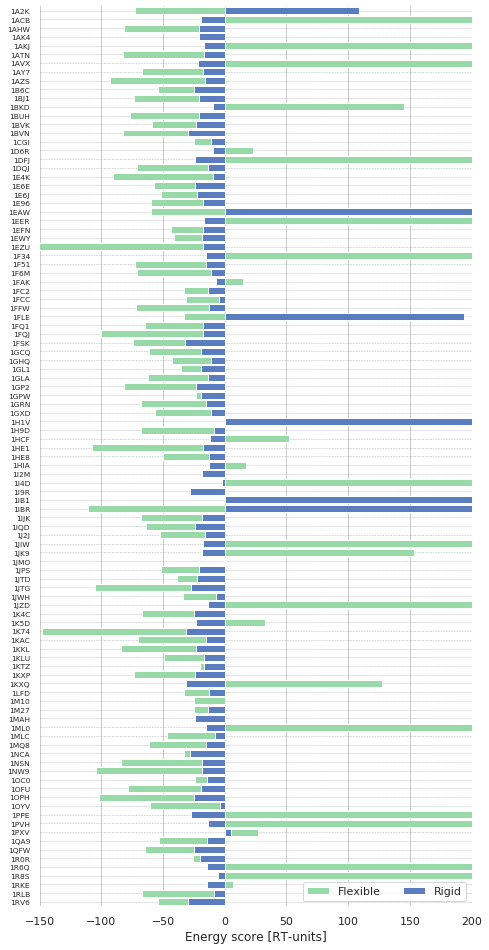

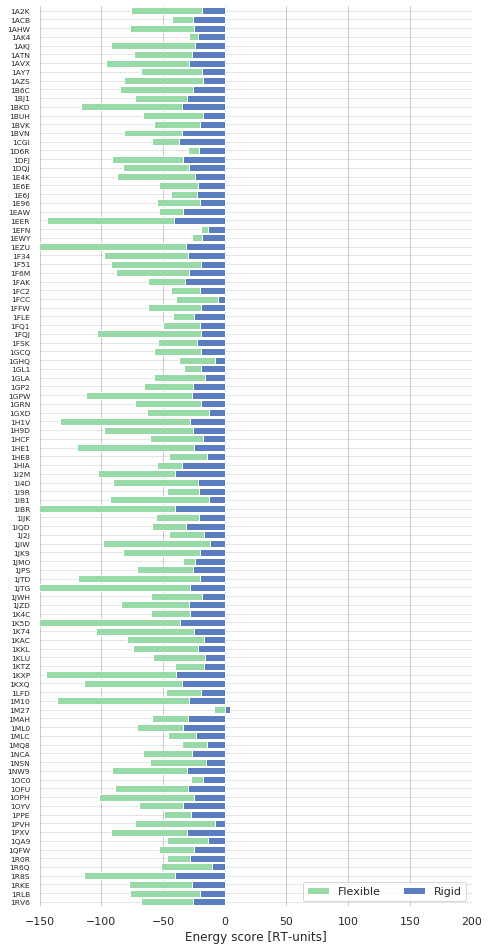

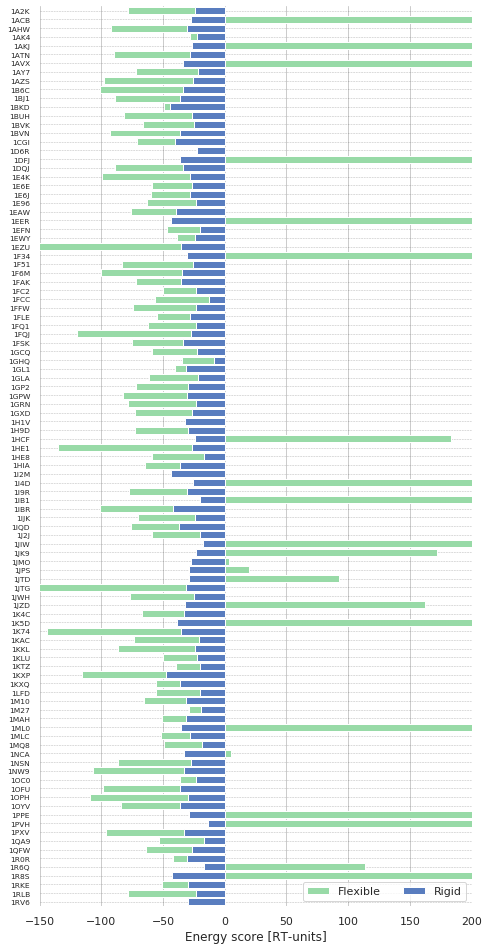

In [35]:
import matplotlib.pyplot as plt
def energy_horizontal_barplot(rigid_score, flexible_score):
    sns.set(style="whitegrid")
    #sns.set_context("paper")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 12.5))
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

    # Plot the crashes where alcohol was involved
    sns.set_color_codes("pastel")
    sns.barplot(x=flexible_score, y="PDB", data=data_energy_part1,
                label="Flexible", color="g")

    # Plot the total crashes
    sns.set_color_codes("muted")
    sns.barplot(x=rigid_score, y="PDB", data=data_energy_part1,
                label="Rigid", color="b")



    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(-150, 200), ylabel="",
           xlabel="Energy score [RT-units]")

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7.5)
    plt.grid(False, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    sns.despine(left=True, bottom=True)

energy_horizontal_barplot("rigid_energy_score.start","energy_score_wo_restraining.start")
plt.savefig('energyScore_beforeDocking-r_vs_f_part1.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
energy_horizontal_barplot("end.","end..6")
plt.savefig('energyScore_afterDocking-r_vs_f_part1.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
energy_horizontal_barplot("rigid_energy_score_refe.start","energy_score_refe_wo_restraining.start")
plt.savefig('energyScore_beforeDocking-bound-refe-r_vs_f_part1.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
energy_horizontal_barplot("end..1","end..7")
plt.savefig('energyScore_afterDocking-bound-refe-r_vs_f_part1.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)

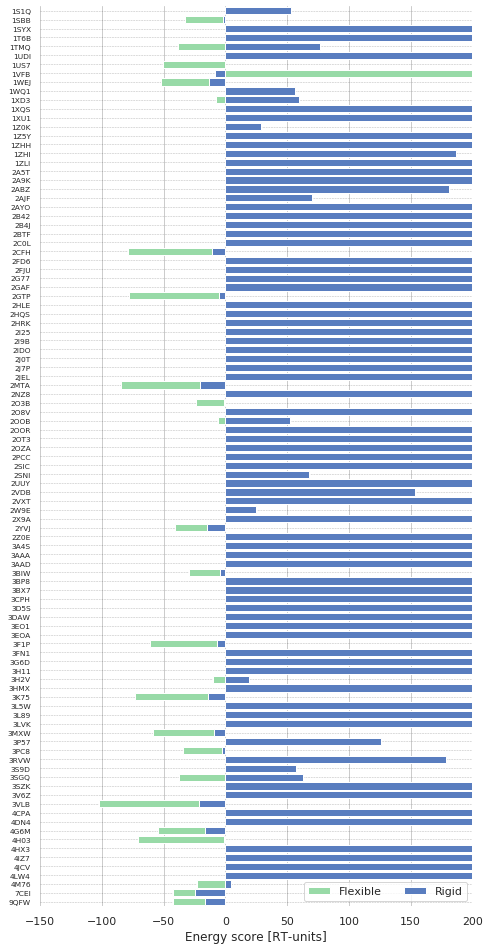

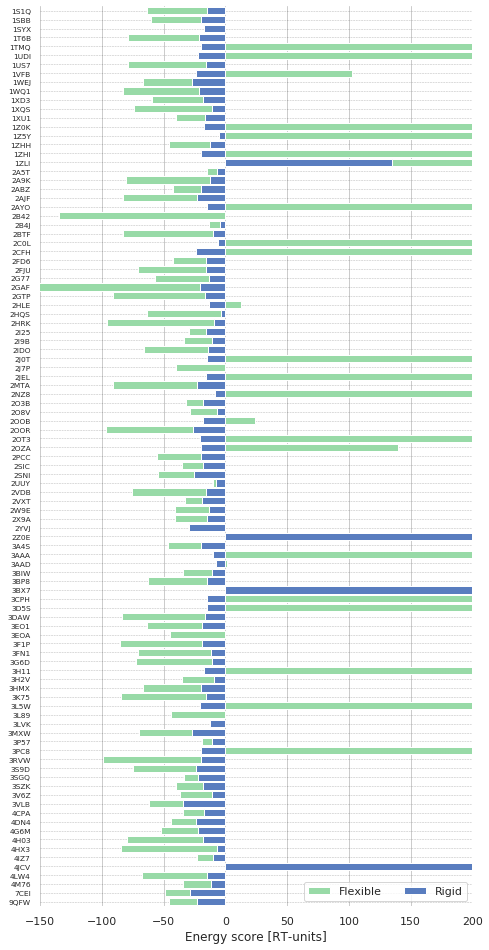

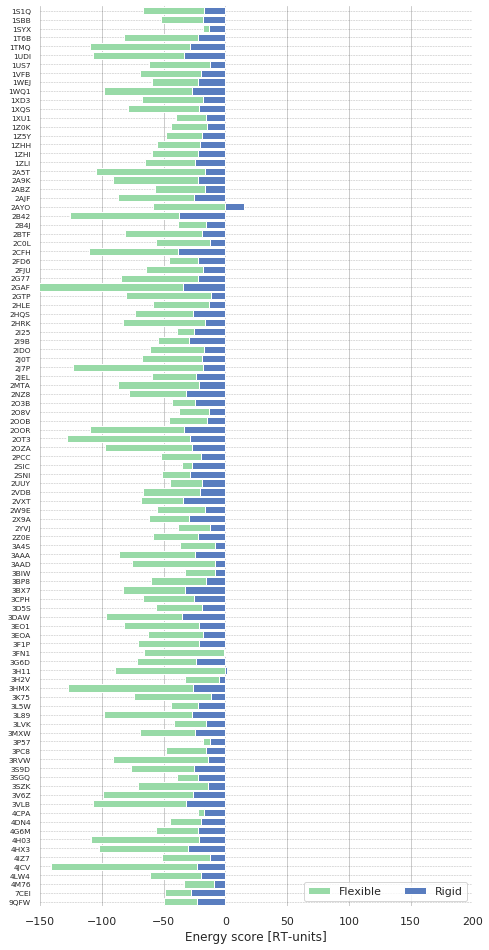

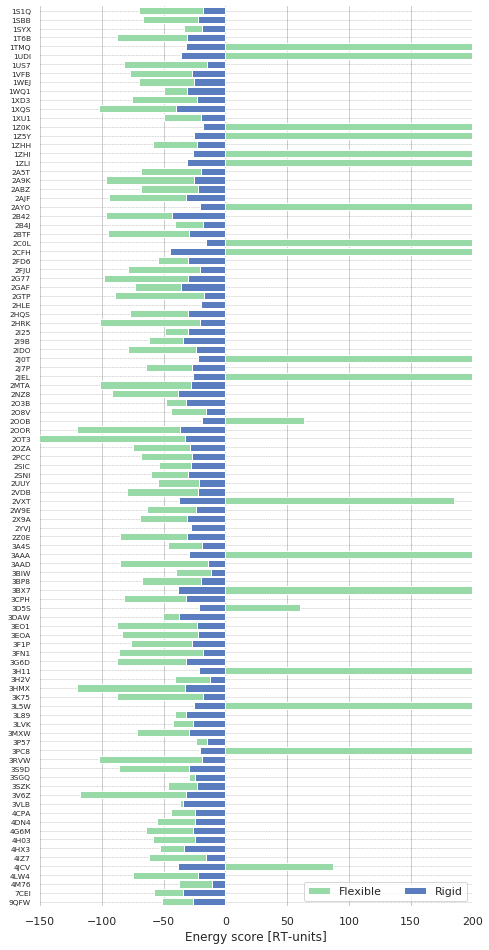

In [33]:
import matplotlib.pyplot as plt
def energy_horizontal_barplot(rigid_score, flexible_score):
    sns.set(style="whitegrid")
    #sns.set_context("paper")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 12.5))
#     plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

    # Plot the crashes where alcohol was involved
    sns.set_color_codes("pastel")
    sns.barplot(x=flexible_score, y="PDB", data=data_energy_part2,
                label="Flexible", color="g")

    # Plot the total crashes
    sns.set_color_codes("muted")
    sns.barplot(x=rigid_score, y="PDB", data=data_energy_part2,
                label="Rigid", color="b")



    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(-150, 200), ylabel="",
           xlabel="Energy score [RT-units]")

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7.5)
    plt.grid(False, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    sns.despine(left=True, bottom=True)

energy_horizontal_barplot("rigid_energy_score.start","energy_score_wo_restraining.start")
plt.savefig('energyScore_beforeDocking-r_vs_f_part2.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
energy_horizontal_barplot("end.","end..6")
plt.savefig('energyScore_afterDocking-r_vs_f_part2.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
energy_horizontal_barplot("rigid_energy_score_refe.start","energy_score_refe_wo_restraining.start")
plt.savefig('energyScore_beforeDocking-bound-refe-r_vs_f_part2.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
energy_horizontal_barplot("end..1","end..7")
plt.savefig('energyScore_afterDocking-bound-refe-r_vs_f_part2.png', dpi=300, bbox_inches = 'tight',
    pad_inches = 0)

In [38]:
data_irmsd=pnd.read_csv("IRMSD_sep.csv", sep="\t")
data_irmsd.describe()
data_all=pnd.read_csv("all_data_sep.csv", sep="\t")
#print(data_all)
print(data_all["inter_iRMSD_end"].describe())
print(data_all["rigid_inter_iRMSD_end"].describe())


count    204.000000
mean       3.469686
std        3.363674
min        0.660000
25%        1.460750
50%        2.377000
75%        4.288250
max       27.386000
Name: inter_iRMSD_end, dtype: float64
count    204.000000
mean       1.702123
std        1.223196
min        0.372000
25%        0.959000
50%        1.392500
75%        2.040000
max        9.012000
Name: rigid_inter_iRMSD_end, dtype: float64


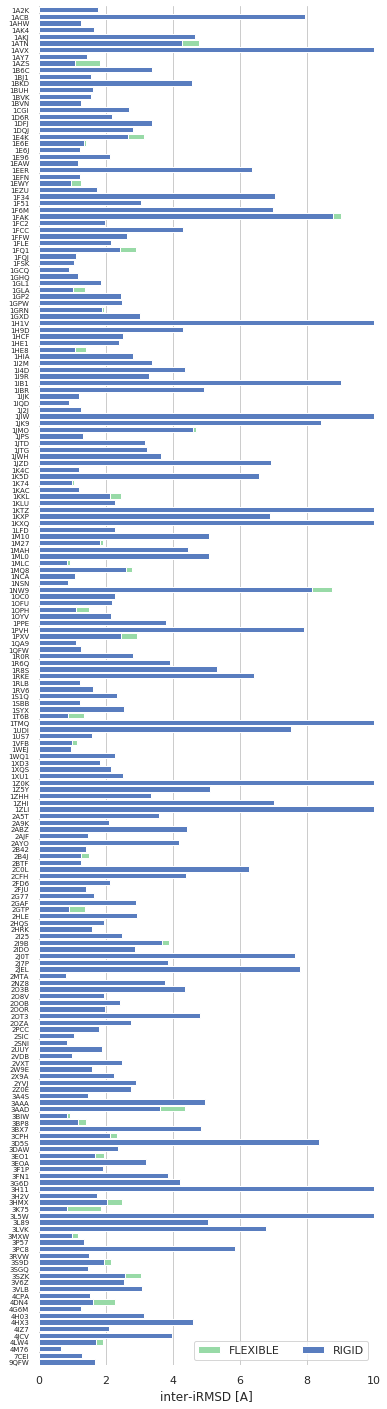

In [116]:
def iRMSD_starttoend_horizontal_barplot(rigid_iRMSD, flexible_iRMSD):
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 25))

    # Plot the iRMSD start value
    sns.set_color_codes("pastel")
    sns.barplot(x=flexible_iRMSD, y="PDB", data=data_all,
                label="FLEXIBLE", color="g")

    # Plot the iRMSD end value
    sns.set_color_codes("muted")
    sns.barplot(x=rigid_iRMSD, y="PDB", data=data_all,
                label="RIGID", color="b")



    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, 10), ylabel="",
           xlabel="inter-iRMSD [A]")

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
    sns.despine(left=True, bottom=True)

iRMSD_starttoend_horizontal_barplot("inter_iRMSD_end","rigid_inter_iRMSD_end")
plt.savefig("inter-iRMSD_end.pdf")



In [6]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 25))

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="end..7", y="PDB", data=data_energy,
            label="Flexible", color="b")

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(x="end.", y="PDB", data=data_energy,
            label="Rigid", color="b")



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-150, 200), ylabel="",
       xlabel="Energy score [kcal/mol]")

ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
sns.despine(left=True, bottom=True)


NameError: name 'sns' is not defined

In [118]:
print(list(data_all['PDB']))

['1A2K', '1ACB', '1AHW', '1AK4', '1AKJ', '1ATN', '1AVX', '1AY7', '1AZS', '1B6C', '1BJ1', '1BKD', '1BUH', '1BVK', '1BVN', '1CGI', '1D6R', '1DFJ', '1DQJ', '1E4K', '1E6E', '1E6J', '1E96', '1EAW', '1EER', '1EFN', '1EWY', '1EZU', '1F34', '1F51', '1F6M', '1FAK', '1FC2', '1FCC', '1FFW', '1FLE', '1FQ1', '1FQJ', '1FSK', '1GCQ', '1GHQ', '1GL1', '1GLA', '1GP2', '1GPW', '1GRN', '1GXD', '1H1V', '1H9D', '1HCF', '1HE1', '1HE8', '1HIA', '1I2M', '1I4D', '1I9R', '1IB1', '1IBR', '1IJK', '1IQD', '1J2J', '1JIW', '1JK9', '1JMO', '1JPS', '1JTD', '1JTG', '1JWH', '1JZD', '1K4C', '1K5D', '1K74', '1KAC', '1KKL', '1KLU', '1KTZ', '1KXP', '1KXQ', '1LFD', '1M10', '1M27', '1MAH', '1ML0', '1MLC', '1MQ8', '1NCA', '1NSN', '1NW9', '1OC0', '1OFU', '1OPH', '1OYV', '1PPE', '1PVH', '1PXV', '1QA9', '1QFW', '1R0R', '1R6Q', '1R8S', '1RKE', '1RLB', '1RV6', '1S1Q', '1SBB', '1SYX', '1T6B', '1TMQ', '1UDI', '1US7', '1VFB', '1WEJ', '1WQ1', '1XD3', '1XQS', '1XU1', '1Z0K', '1Z5Y', '1ZHH', '1ZHI', '1ZLI', '2A5T', '2A9K', '2ABZ', '2AJF',

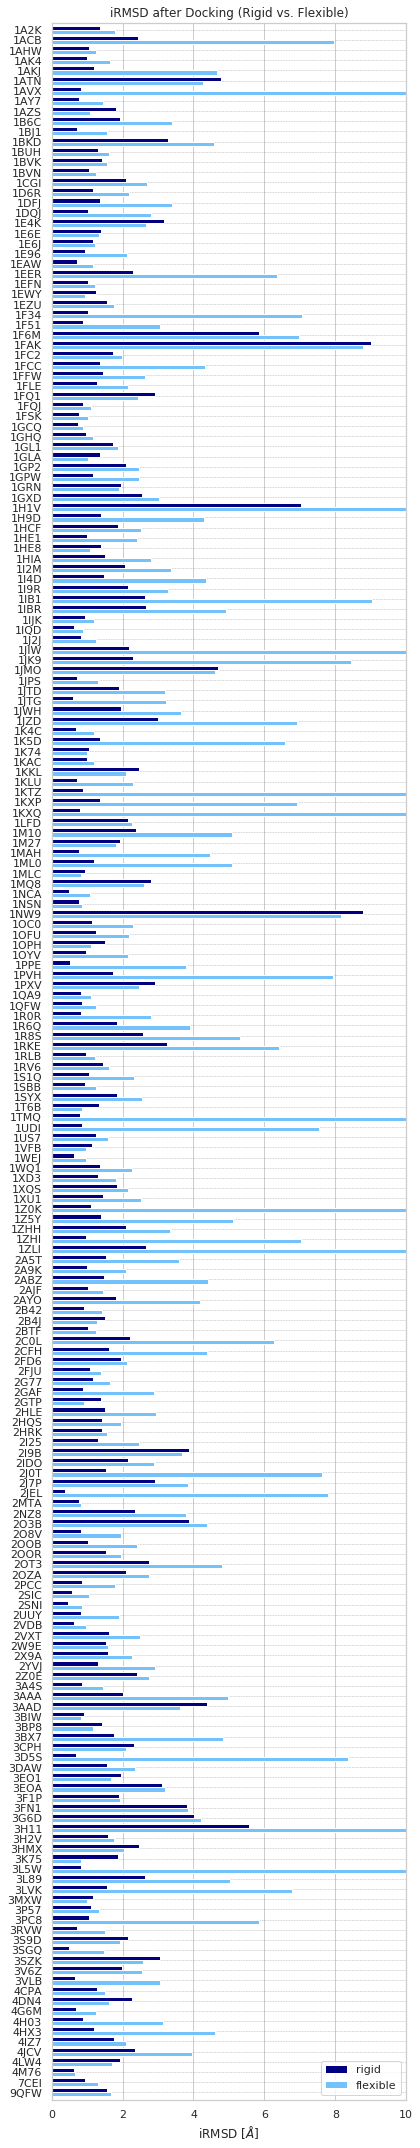

In [168]:
import numpy as np

length = len(data_all)
x_labels = (list(data_all['PDB']))

# Set plot parameters
fig, ax = plt.subplots(figsize=(6, 30))
width = 0.4 # width of bar
x = np.arange(length)

ax.barh(x, list(data_all['rigid_inter_iRMSD_end']), width, color='#000080', label='rigid')
ax.barh(x + width, list(data_all['inter_iRMSD_end']), width, color='#73C2FB', label='flexible')
#ax.bar(x + (2 * width), list(data_all['inter_iRMSD_end']), width, color='#6593F5', label='Case-3')
#ax.bar(x + (3 * width), list(data_all['inter_iRMSD_end']), width, color='#0F52BA', label='Case-4')

ax.set_xlabel(r'iRMSD [$\AA$]')
ax.set_xlim(0,10)
ax.set_yticks(x + width/2)
ax.set_yticklabels(x_labels)
ax.set_ylim(-0.5,x.size)
ax.invert_yaxis()
#ax.set_yticklabels(x_labels, rotation=90)
#ax.set_xlabel('Sample')
ax.set_title('iRMSD after Docking (Rigid vs. Flexible)')
ax.legend()
plt.grid(False, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.savefig('iRMSD_afterDocking_r-vs-f.png', dpi=300)
plt.show()

